In [1]:
import experiment as exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mattplotlib as mplt
import seaborn as sns

Invoking __init__.py for NDNT.utils


In [2]:
e = exp.load('scaffold_convL0_filters')

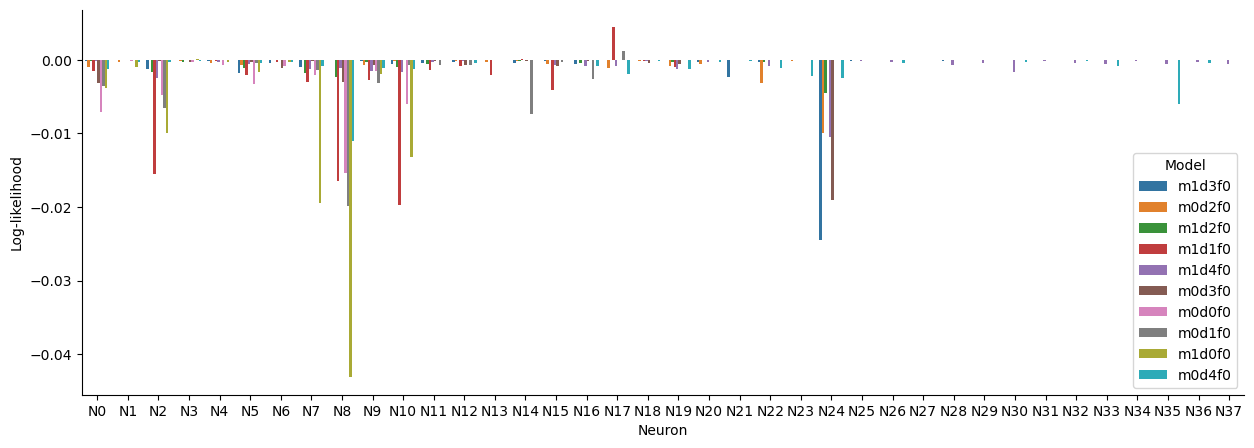

In [3]:
mplt.lightmode()
e.plot_LLs()

In [ ]:
e['m0d0f0'].model.NDN.list_parameters()

In [ ]:
e['m1d0f0'].model.NDN.list_parameters()

In [ ]:
e['m0d0f0'].model.NDN.list_parameters()

In [ ]:
e[0].model.get_network('readout').layers[-1].get_weights()

In [ ]:
mplt.darkmode()
plt.figure(figsize=(15,5))
for trial in e.trials:
    if 'm1' in trial.name: continue
    plt.scatter(range(len(trial.LLs)), trial.LLs, label=trial.name, marker='s')
plt.legend()
plt.show()

In [ ]:
mplt.lightmode()

df = pd.DataFrame({
    'Factor': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

In [ ]:
# get maximum num_neurons for the experiment
max_num_neurons = 0
for trial in e.trials:
    if trial.model.output.num_neurons > max_num_neurons:
        max_num_neurons = trial.model.output.num_neurons

df = pd.DataFrame({
    'Neuron': ['N'+str(n) for n in range(max_num_neurons)],
})
for trial in e.trials:
    df[trial.name] = np.concatenate((trial.LLs, np.zeros(max_num_neurons-len(trial.LLs), dtype=np.float32)))
fig, ax1 = plt.subplots(figsize=(20, 5))
tidy = df.melt(id_vars='Neuron').rename(columns=str.title)
sns.barplot(x='Neuron', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

In [ ]:
trial.LLs, np.zeros(max_num_neurons-len(trial.LLs), dtype=np.float32)

In [ ]:
from model import *
l0 = Layer(NLtype=NL.relu, norm_type=Norm.max)

In [ ]:
mplt.lightmode()
e.model_template.draw_network()